# Comparison of GLM & linear regression on bike data

## Data preparation

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
df = pd.read_csv(
    'nyc_bb_bicyclist_counts.csv',
    header=0, 
    parse_dates=[0], 
    index_col=[0],
    date_format="%d-%b-%y")

In [29]:
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

In [30]:
df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,4,5,1
2017-04-02,62.1,41.0,0.00,2021,4,6,2
2017-04-03,63.0,50.0,0.03,2470,4,0,3
2017-04-04,51.1,46.0,1.18,723,4,1,4
2017-04-05,63.0,46.0,0.00,2807,4,2,5


<Axes: xlabel='BB_COUNT', ylabel='Count'>

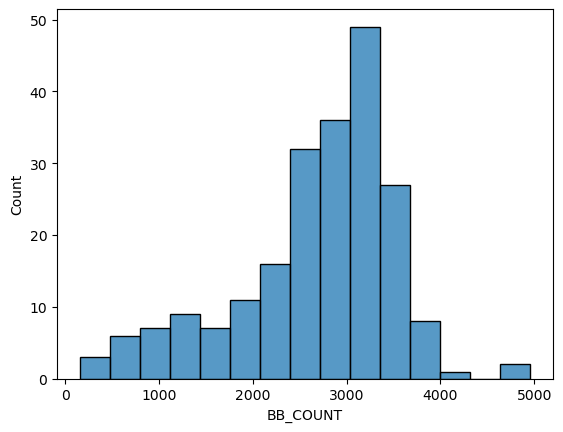

In [31]:
sns.histplot(df['BB_COUNT'])

## Splitting & variable selection

In [32]:
#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=165
Testing data set length=49


In [33]:
# Define the dependent (response) variable and independent (predictor) variables
y_train = df_train['BB_COUNT']  # Dependent variable
X_train = df_train[['DAY', 'DAY_OF_WEEK', 'MONTH', 'HIGH_T', 'LOW_T', 'PRECIP']]  # Predictor variables

y_test = df_test['BB_COUNT']  # Dependent variable
X_test = df_test[['DAY', 'DAY_OF_WEEK', 'MONTH', 'HIGH_T', 'LOW_T', 'PRECIP']]  # Predictor variables

# Add a constant to the design matrix (for the intercept term)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

## Scaling ?

In [34]:
'''from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and test sets
X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])  # Exclude the constant column
X_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])       # Exclude the constant column

# Re-add the constant term to both training and test sets
X_train = sm.add_constant(X_train)  # Re-add the constant to X_train
X_test = sm.add_constant(X_test)    # Re-add the constant to X_test

# The dependent variable (y) remains unchanged
y_train = df_train['BB_COUNT']  # Dependent variable
y_test = df_test['BB_COUNT']    # Dependent variable'''

"from sklearn.preprocessing import StandardScaler\nimport pandas as pd\nimport statsmodels.api as sm\n\n# Initialize the scaler\nscaler = StandardScaler()\n\n# Fit the scaler on the training set and transform both training and test sets\nX_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])  # Exclude the constant column\nX_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])       # Exclude the constant column\n\n# Re-add the constant term to both training and test sets\nX_train = sm.add_constant(X_train)  # Re-add the constant to X_train\nX_test = sm.add_constant(X_test)    # Re-add the constant to X_test\n\n# The dependent variable (y) remains unchanged\ny_train = df_train['BB_COUNT']  # Dependent variable\ny_test = df_test['BB_COUNT']    # Dependent variable"

## Linear Regression

In [35]:
# Fit a linear regression model
reg = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               BB_COUNT   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     40.48
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.38e-29
Time:                        00:04:50   Log-Likelihood:                -1276.5
No. Observations:                 165   AIC:                             2567.
Df Residuals:                     158   BIC:                             2589.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         196.2419    345.719      0.568      

In [36]:
#Make some predictions on the test data set.
reg_predictions = reg.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
reg_predictions_summary = reg_predictions.summary_frame()
print(reg_predictions_summary)

reg_predicted_counts=reg_predictions_summary['mean']

                   mean     mean_se  mean_ci_lower  mean_ci_upper  \
Date                                                                
2017-04-02  2723.646516  166.658904    2394.479835    3052.813196   
2017-04-06  1159.611940  138.295979     886.464649    1432.759231   
2017-04-08  2360.102614  138.033955    2087.472844    2632.732383   
2017-04-14  2648.565491  101.481533    2448.130120    2849.000861   
2017-04-15  2404.876410   99.550226    2208.255548    2601.497272   
2017-04-20  2521.768810   95.712899    2332.727023    2710.810598   
2017-05-07  1609.271450  144.706442    1323.462904    1895.079997   
2017-05-17  3870.754299  135.600851    3602.930133    4138.578464   
2017-05-19  3152.122273  109.002094    2936.833102    3367.411444   
2017-05-21  2408.293778  101.510883    2207.800438    2608.787118   
2017-05-30  1964.520182  130.585567    1706.601664    2222.438700   
2017-05-31  3166.717339  115.186774    2939.212855    3394.221822   
2017-06-02  2714.110091   90.69917

## GLM

In [37]:
# Fit a GLM model with Poisson family
glm = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display the model summary
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  165
Model:                            GLM   Df Residuals:                      158
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11402.
Date:                Wed, 04 Dec 2024   Deviance:                       21214.
Time:                        00:04:50   Pearson chi2:                 2.11e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9225      0.013    541.343      

In [38]:
#Make some predictions on the test data set.
glm_predictions = glm.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
glm_predictions_summary = glm_predictions.summary_frame()
print(glm_predictions_summary)

glm_predicted_counts=glm_predictions_summary['mean']
actual_counts = y_test

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2017-04-02  2587.805435  14.820913    2558.919407    2617.017540
2017-04-06  1094.806023   7.309752    1080.572506    1109.227026
2017-04-08  2281.972131  11.157413    2260.208451    2303.945375
2017-04-14  2583.833529   9.198356    2565.867832    2601.925019
2017-04-15  2371.887407   8.510861    2355.264946    2388.627182
2017-04-20  2306.086120   7.992826    2290.473559    2321.805101
2017-05-07  1764.693163   9.418216    1746.330009    1783.249410
2017-05-17  4156.145794  18.454460    4120.132652    4192.473719
2017-05-19  3252.193913  11.712244    3229.319162    3275.230696
2017-05-21  2371.414269   8.531998    2354.750683    2388.195776
2017-05-30  2031.986278   9.801518    2012.866181    2051.287996
2017-05-31  3139.716055  11.953667    3116.374495    3163.232443
2017-06-02  2695.776291   8.530544    2679.108473    2712.547806
2017-06-07  2646.652746  

In [39]:
# Extract deviance values from the model
residual_deviance = glm.deviance  # Residual deviance
null_deviance = glm.null_deviance  # Null deviance

# Calculate explained deviance
explained_deviance = 1 - (residual_deviance / null_deviance)

# Print the result
print("Explained Deviance:", explained_deviance)

Explained Deviance: 0.6356352921365194


## Plot

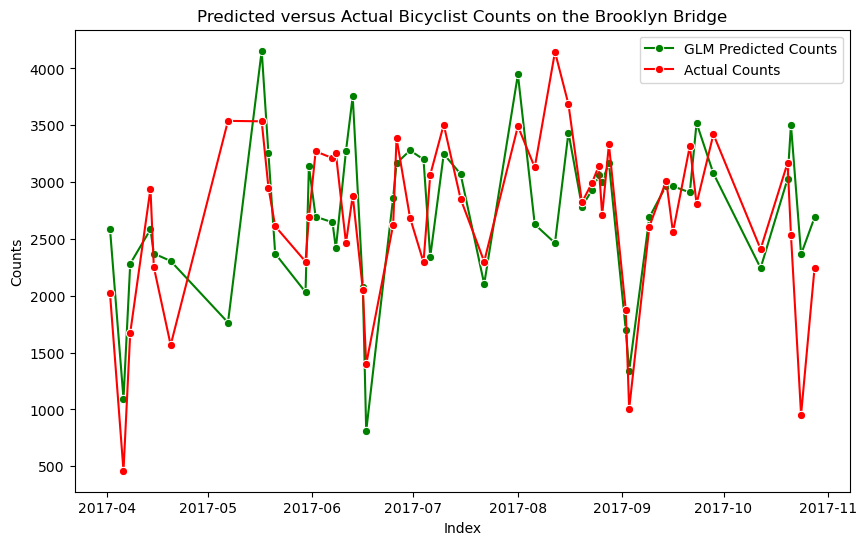

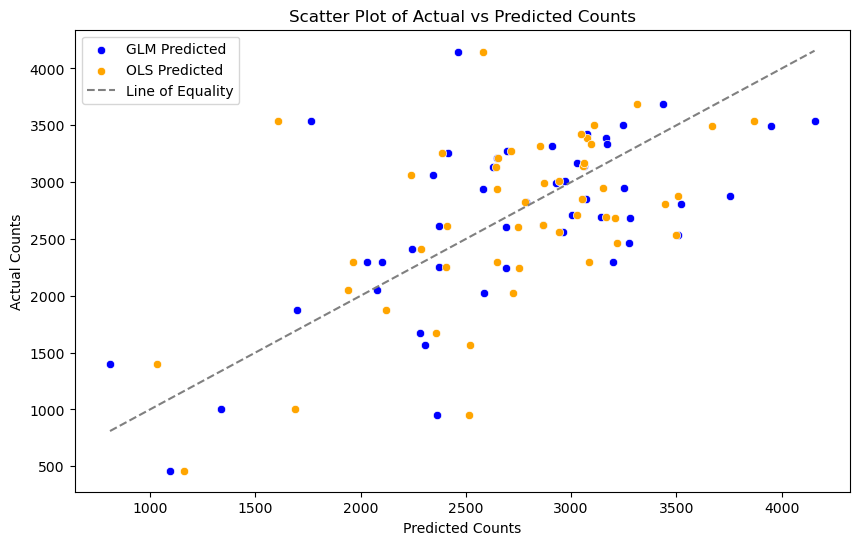

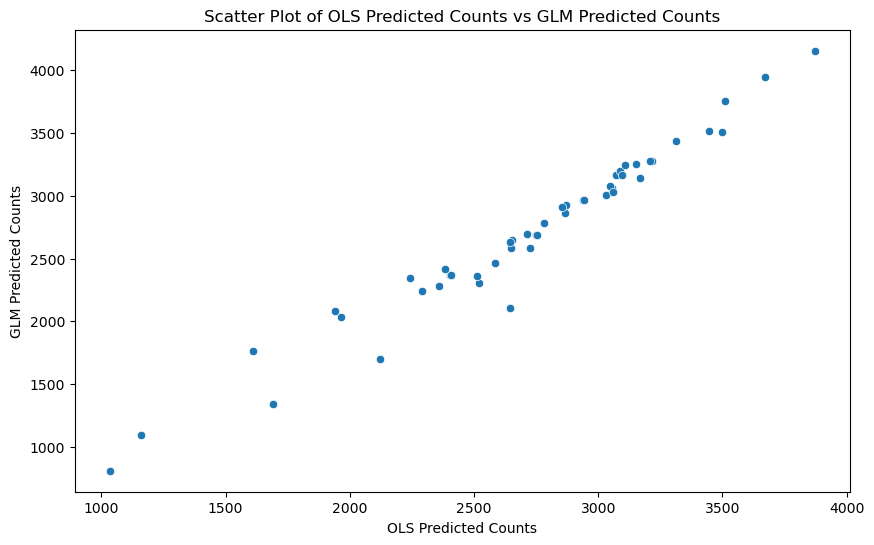

In [40]:
# Plot 1: Predicted versus Actual Counts
plt.figure(figsize=(10, 6))
plt.title("Predicted versus Actual Bicyclist Counts on the Brooklyn Bridge")
sns.lineplot(x=X_test.index, y=glm_predicted_counts, label='GLM Predicted Counts', color='green', marker='o')
sns.lineplot(x=X_test.index, y=actual_counts, label='Actual Counts', color='red', marker='o')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Counts")
plt.show()

# Plot 2: Scatter Plot of Actual vs Predicted Counts (GLM and OLS)
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot of Actual vs Predicted Counts")
sns.scatterplot(x=glm_predicted_counts, y=actual_counts, label='GLM Predicted', color='blue')
sns.scatterplot(x=reg_predicted_counts, y=actual_counts, label='OLS Predicted', color='orange')
plt.plot([min(glm_predicted_counts), max(glm_predicted_counts)], [min(glm_predicted_counts), max(glm_predicted_counts)], color='gray', linestyle='--', label='Line of Equality')
plt.xlabel("Predicted Counts")
plt.ylabel("Actual Counts")
plt.legend()
plt.show()

# Plot 3: OLS vs GLM Predicted Counts
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot of OLS Predicted Counts vs GLM Predicted Counts")
sns.scatterplot(x=reg_predicted_counts, y=glm_predicted_counts)
plt.xlabel("OLS Predicted Counts")
plt.ylabel("GLM Predicted Counts")
plt.show()
